In [1]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 15.7 MB/s 
     |████████████████████████████████| 890 kB 57.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Angraj project dmkd/01. bank-additional-full.csv', sep=";")

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 41188 rows and 21 columns.


Dataset Preprocessing

We need to transform all categorical data to numerical ones

In [43]:
pre_df = df.copy()
pre_df.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
pre_df.head(5)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
pre_df["job"] = pre_df["job"].apply(lambda x: 0 if x=="admin" else (1 if x=="blue-collar" else (2 if x=="entrepreneur" else (3 if x=="housemaid" else (4 if x=="management" else (5 if x=="retired" else (6 if x=="self-employed" else (7 if x=="services" else (8 if x=="student" else (9 if x=="technician" else (10 if x=="unemployed" else (11 if x=="unknown" else 12))))))))))))


In [45]:
pre_df["education"] = pre_df["education"].apply(lambda x: 0 if x=="basic.4y" else (1 if x=="basic.6y" else (2 if x=="basic.9y" else (3 if x=="high.school" else (4 if x=="illiterate" else (5 if x=="professional.course" else (6 if x=="university.degree" else (7 if x=="unknown" else 8 ))))))))

In [46]:
pre_df["marital"] = pre_df["marital"].apply(lambda x: 0 if x=="divorced" else (1 if x=="married" else (2 if x=="single" else (3 if x=="unknown" else 4))))

In [47]:
pre_df["housing"] = pre_df["housing"].apply(lambda x: 0 if x=="no" else 1)

In [48]:
pre_df["loan"] = pre_df["loan"].apply(lambda x: 0 if x=="no" else 1)

In [49]:
pre_df["poutcome"] = pre_df["poutcome"].apply(lambda x: 0 if x=="failure" else (1 if x=="nonexistent" else (2 if x=="success" else 3)))

In [50]:
pre_df["y"] = pre_df["y"].apply(lambda x: 0 if x=="no" else 1)

In [51]:
pre_df.head(10)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,12,1,1,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,0,0,198,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,12,1,5,0,0,139,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,0,0,217,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,1,0,380,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,1,0,50,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


k-nearest neighbor

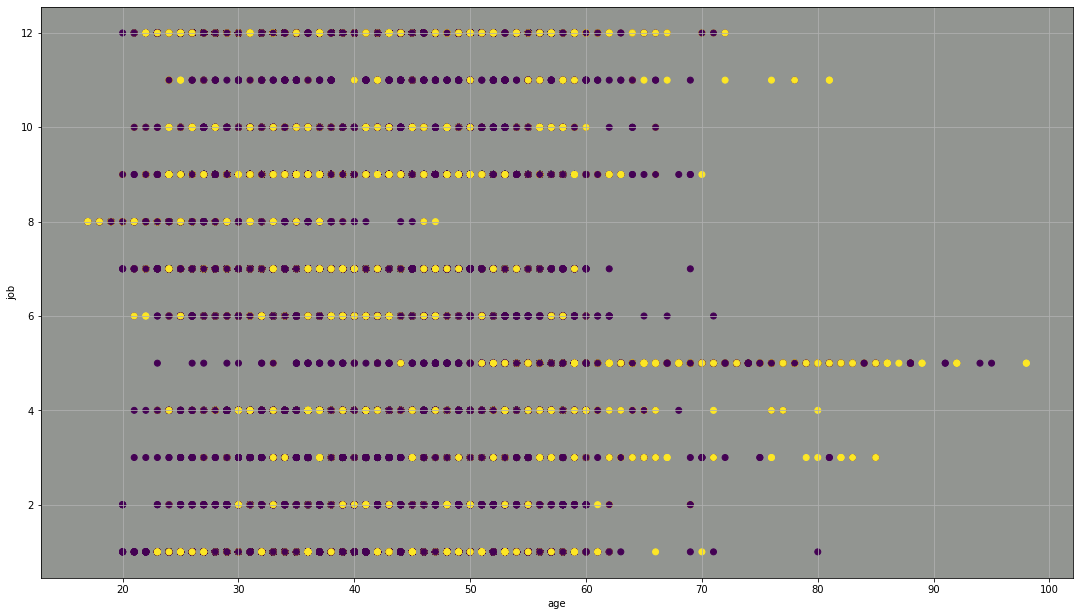

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_facecolor('xkcd:grey')
scatter = plt.scatter( pre_df['age'],pre_df['job'], c=pre_df['y'])
plt.xlabel('age')
plt.ylabel('job')
plt.grid(True)
plt.show()

In [54]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [59]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='poutcome',
        automargin=True,
    ),
    xaxis=dict(
        title='campaign',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=pre_df['campaign'], y=pre_df['poutcome'],text=pre_df['y'],
                    mode='markers',
                    name='y',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,                        
                        color = pre_df['y'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [60]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='job',
        automargin=True,
    ),
    xaxis=dict(
        title='age',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=pre_df['age'], y=pre_df['job'],text=pre_df['y'],
                    mode='markers',
                    name='y',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,                        
                        color = pre_df['y'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [61]:
pre_df.head(10)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,12,1,1,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,0,0,198,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,12,1,5,0,0,139,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,0,0,217,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,1,0,380,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,1,0,50,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='cons.conf.idx',
        automargin=True,
    ),
    xaxis=dict(
        title='cons.price.idx',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=pre_df['cons.price.idx'], y=pre_df['cons.conf.idx'],text=pre_df['y'],
                    mode='markers',
                    name='y',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,                        
                        color = pre_df['y'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Adding new data to the dataframe to see its output

In [63]:
pre_df.head(2)

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [67]:
df2 = pd.DataFrame([[40,6,2,4,1,0,150,0,0,1,1.2,93.997,-36.6,4.654,5180,2],[50,2,2,3,0,1,200,0,1,0,1.3,93.93,-36.2,4.777,5090,2]], columns=['age','job','marital','education','housing','loan','duration','campaign','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y'])

In [71]:
new_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41190.000000,41190.000000,41190.000000,41188.000000,41190.000000,41190.000000,41190.000000,41190.000000,41190.000000,41190.000000
mean,40.024302,258.280966,2.567468,962.475454,0.172979,0.081942,93.575683,-40.502401,3.621344,5167.034355
std,10.421113,259.273662,2.770004,186.910907,0.494907,1.570943,0.578832,4.628174,1.734422,72.250799
min,17.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [73]:
new_df = pre_df.copy()
new_df=new_df.append(df2)

In [74]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='cons.conf.idx',
        automargin=True,
    ),
    xaxis=dict(
        title='cons.price.idx',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=new_df['cons.price.idx'], y=new_df['cons.conf.idx'],text= new_df['y'],
                    mode='markers',
                    name='y',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,                        
                        color = new_df['y'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Preparing dataset to be fed into Model

In [75]:
y = pre_df['y']
X = pre_df.drop(columns=['y'])

print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

Data shape:  (41188, 15)
Labels shape:  (41188,)


Supervised Learning

Testing Set

In [76]:
# Splittng train:test in 90:10 ratio

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37069, 15)
(37069,)
(4119, 15)
(4119,)


COMBINATION FUNCTION


Training and testing with all available data
```
# This is formatted as code
```



In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
        score.append(clf.score(X,y))

score = np.reshape(score,(-1,2))

In [79]:
score

array([[0.93978829, 1.        ],
       [0.94095368, 1.        ],
       [0.9274546 , 1.        ],
       [0.92869282, 1.        ],
       [0.92381276, 1.        ],
       [0.92369137, 1.        ],
       [0.92087501, 1.        ],
       [0.92114208, 1.        ],
       [0.91910265, 1.        ],
       [0.91951539, 1.        ],
       [0.91759736, 1.        ],
       [0.91815577, 1.        ],
       [0.91682043, 1.        ],
       [0.91701466, 1.        ],
       [0.91694183, 1.        ],
       [0.91691755, 1.        ],
       [0.91652909, 1.        ],
       [0.91609207, 1.        ],
       [0.91611634, 1.        ]])

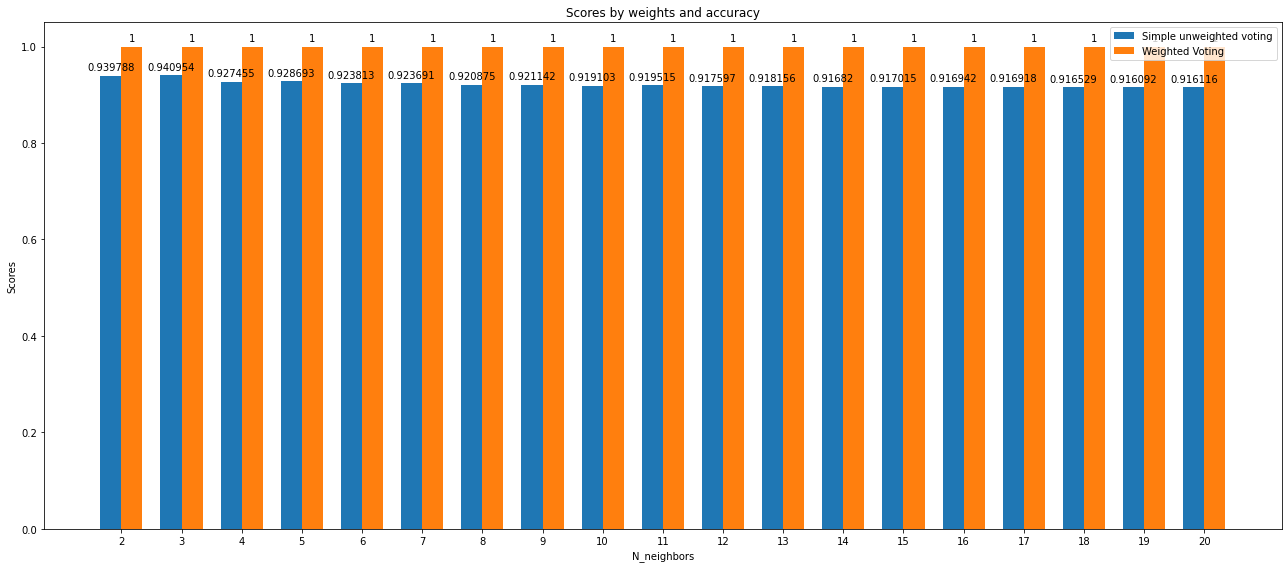

In [80]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Scenario 2 - Training with training data( 90% ) and testing with testing data( 10% )

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)
        score.append(clf.score(X_test,y_test))

score = np.reshape(score,(-1,2))

In [82]:
score

array([[0.88468075, 0.87254188],
       [0.8851663 , 0.88322408],
       [0.89026463, 0.88249575],
       [0.89317796, 0.89026463],
       [0.89876184, 0.89026463],
       [0.89609128, 0.89512017],
       [0.90094683, 0.89609128],
       [0.89997572, 0.89779073],
       [0.90143239, 0.89681962],
       [0.90313183, 0.89827628],
       [0.90483127, 0.89900461],
       [0.90580238, 0.90337461],
       [0.90677349, 0.90483127],
       [0.90653071, 0.90507405],
       [0.90847293, 0.90507405],
       [0.90531682, 0.90386016],
       [0.90628793, 0.9055596 ],
       [0.9077446 , 0.90580238],
       [0.90604516, 0.90725904]])

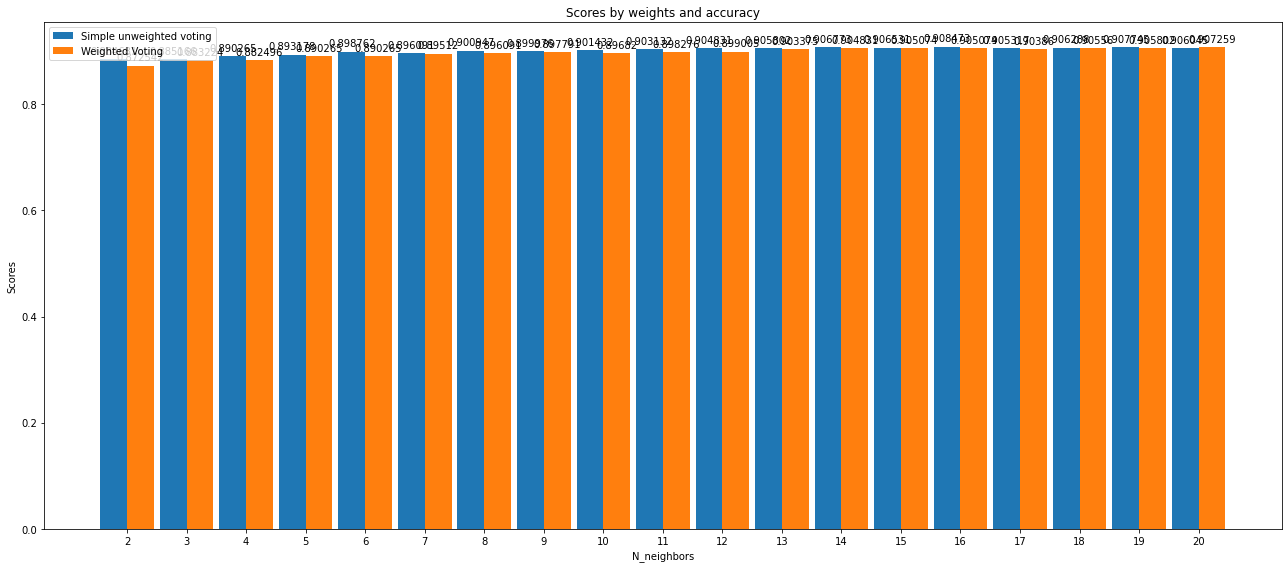

In [83]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Checking for individual predictions that our model has made

Let's check what our 2 new client suggests in our dataset.

In [85]:
pred_labels = clf.predict(df2.drop(columns=["y"]))

In [86]:
pred_labels

array([0, 0])

so that is a NO